<a href="https://colab.research.google.com/github/zehra-sana/ML-Projects/blob/main/Zoi_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [93]:
df = pd.read_csv("/content/immo_data.csv")

In [94]:
df.head(3)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.0,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.0,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19


In [95]:
df['description'][0]

'Die ebenerdig zu erreichende Erdgeschosswohnung befindet sich in einem gepflegten 8-Familienhaus. Aufgrund der Hanglage bietet sich ein unverbaubarer Blick ins Grüne.'

In [96]:
# Find unique values in the 'city' column
unique_values = df['geo_bln'].unique()
len(unique_values)

16

In [97]:
# Check unique values in both columns
unique_regio1 = df['regio1'].unique()
unique_geo_bln = df['geo_bln'].unique()

# Print unique values in both columns
print("Unique values in regio1:", unique_regio1)
print("Unique values in geo_bln:", unique_geo_bln)

# Find differences between the two columns
regio1_not_in_geo_bln = set(unique_regio1) - set(unique_geo_bln)
geo_bln_not_in_regio1 = set(unique_geo_bln) - set(unique_regio1)

print("Values in regio1 but not in geo_bln:", regio1_not_in_geo_bln)
print("Values in geo_bln but not in regio1:", geo_bln_not_in_regio1)


Unique values in regio1: ['Nordrhein_Westfalen' 'Rheinland_Pfalz' 'Sachsen' 'Bremen'
 'Schleswig_Holstein' 'Baden_Württemberg' 'Thüringen' 'Hessen'
 'Niedersachsen' 'Bayern' 'Hamburg' 'Sachsen_Anhalt'
 'Mecklenburg_Vorpommern' 'Berlin' 'Brandenburg' 'Saarland']
Unique values in geo_bln: ['Nordrhein_Westfalen' 'Rheinland_Pfalz' 'Sachsen' 'Bremen'
 'Schleswig_Holstein' 'Baden_Württemberg' 'Thüringen' 'Hessen'
 'Niedersachsen' 'Bayern' 'Hamburg' 'Sachsen_Anhalt'
 'Mecklenburg_Vorpommern' 'Berlin' 'Brandenburg' 'Saarland']
Values in regio1 but not in geo_bln: set()
Values in geo_bln but not in regio1: set()


In [98]:
# Example of custom mapping (this is hypothetical, you would need to define the actual mapping based on your data)
mapping = {
    'regio1_value1': 'geo_bln_value1',
    'regio1_value2': 'geo_bln_value2',
    # Add other mappings
}

# Apply mapping to merge columns (if appropriate)
df['merged_states'] = df['regio1'].map(mapping).fillna(df['geo_bln'])


In [99]:
df['merged_states'].unique()

array(['Nordrhein_Westfalen', 'Rheinland_Pfalz', 'Sachsen', 'Bremen',
       'Schleswig_Holstein', 'Baden_Württemberg', 'Thüringen', 'Hessen',
       'Niedersachsen', 'Bayern', 'Hamburg', 'Sachsen_Anhalt',
       'Mecklenburg_Vorpommern', 'Berlin', 'Brandenburg', 'Saarland'],
      dtype=object)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [101]:
shape = df.shape
f"Dataset has {shape[0]} rows and {shape[1]} columns."

'Dataset has 268850 rows and 50 columns.'

In [102]:
df.isnull().sum()

,0
regio1,0
serviceCharge,6909
heatingType,44856
telekomTvOffer,32619
telekomHybridUploadSpeed,223830
newlyConst,0
balcony,0
picturecount,0
pricetrend,1832
telekomUploadSpeed,33358


In [103]:
numerical_columns = ["serviceCharge", "baseRentRange", "yearConstructed", "numParkSpaces", "livingSpace", "numRooms", "floorNum", "numberOfFloors", "refubrishYear"]

In [104]:
len(numerical_columns)

9

In [105]:
categorical_columns = ["geo_bln", "heatingType", "newlyConstructed", "hasBalcony", "firingTypes", "hasKitchen", "hasCellar", "geo_krs", "condition", "interiorQual", "petsAllowed", "hasLift", "typeOfFlat", "geo_plz", "hasGarden", "geo_cty"]

In [106]:
len(categorical_columns)

16

In [107]:
import re

def camel_to_snake(name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    s2 = re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1)
    return s2.lower()

df.columns = [camel_to_snake(col) for col in df.columns]
df.rename(columns={"regio1": "state","regio2": "city","regio3": "geo_cty", "newly_const": "newly_constructed", "no_park_spaces": "num_park_spaces", "balcony": "has_balcony", "cellar": "has_cellar", "lift": "has_lift", "no_rooms": "num_rooms", "floor": "floor_num", "garden": "has_garden", "last_refurbish": "refubrish_year"}, inplace=True)
numerical = [camel_to_snake(col) for col in numerical_columns]
categorical = [camel_to_snake(col) for col in categorical_columns]

df.columns

Index(['state', 'service_charge', 'heating_type', 'telekom_tv_offer',
       'telekom_hybrid_upload_speed', 'newly_constructed', 'has_balcony',
       'picturecount', 'pricetrend', 'telekom_upload_speed', 'total_rent',
       'year_constructed', 'scout_id', 'num_park_spaces', 'firing_types',
       'has_kitchen', 'geo_bln', 'has_cellar', 'year_constructed_range',
       'base_rent', 'house_number', 'living_space', 'geo_krs', 'condition',
       'interior_qual', 'pets_allowed', 'street', 'street_plain', 'has_lift',
       'base_rent_range', 'type_of_flat', 'geo_plz', 'num_rooms',
       'thermal_char', 'floor_num', 'number_of_floors', 'no_rooms_range',
       'has_garden', 'living_space_range', 'city', 'geo_cty', 'description',
       'facilities', 'heating_costs', 'energy_efficiency_class',
       'refubrish_year', 'electricity_base_price', 'electricity_kwh_price',
       'date', 'merged_states'],
      dtype='object')

In [108]:
def missing_df(df):
    total_missing = df.isnull().sum()
    percent_missing = 100 * total_missing / len(df)
    missing_df = pd.DataFrame(data={"Total values missing": total_missing, "Percent missing": percent_missing})
    missing_df = missing_df[missing_df.iloc[:, 1] != 0].sort_values("Percent missing", ascending=False).round(2)
    return missing_df

In [109]:
missing_values = missing_df(df)
missing_values

,Total values missing,Percent missing
telekom_hybrid_upload_speed,223830,83.25
electricity_kwh_price,222004,82.58
electricity_base_price,222004,82.58
energy_efficiency_class,191063,71.07
refubrish_year,188139,69.98
heating_costs,183332,68.19
num_park_spaces,175798,65.39
pets_allowed,114573,42.62
interior_qual,112665,41.91
thermal_char,106506,39.62


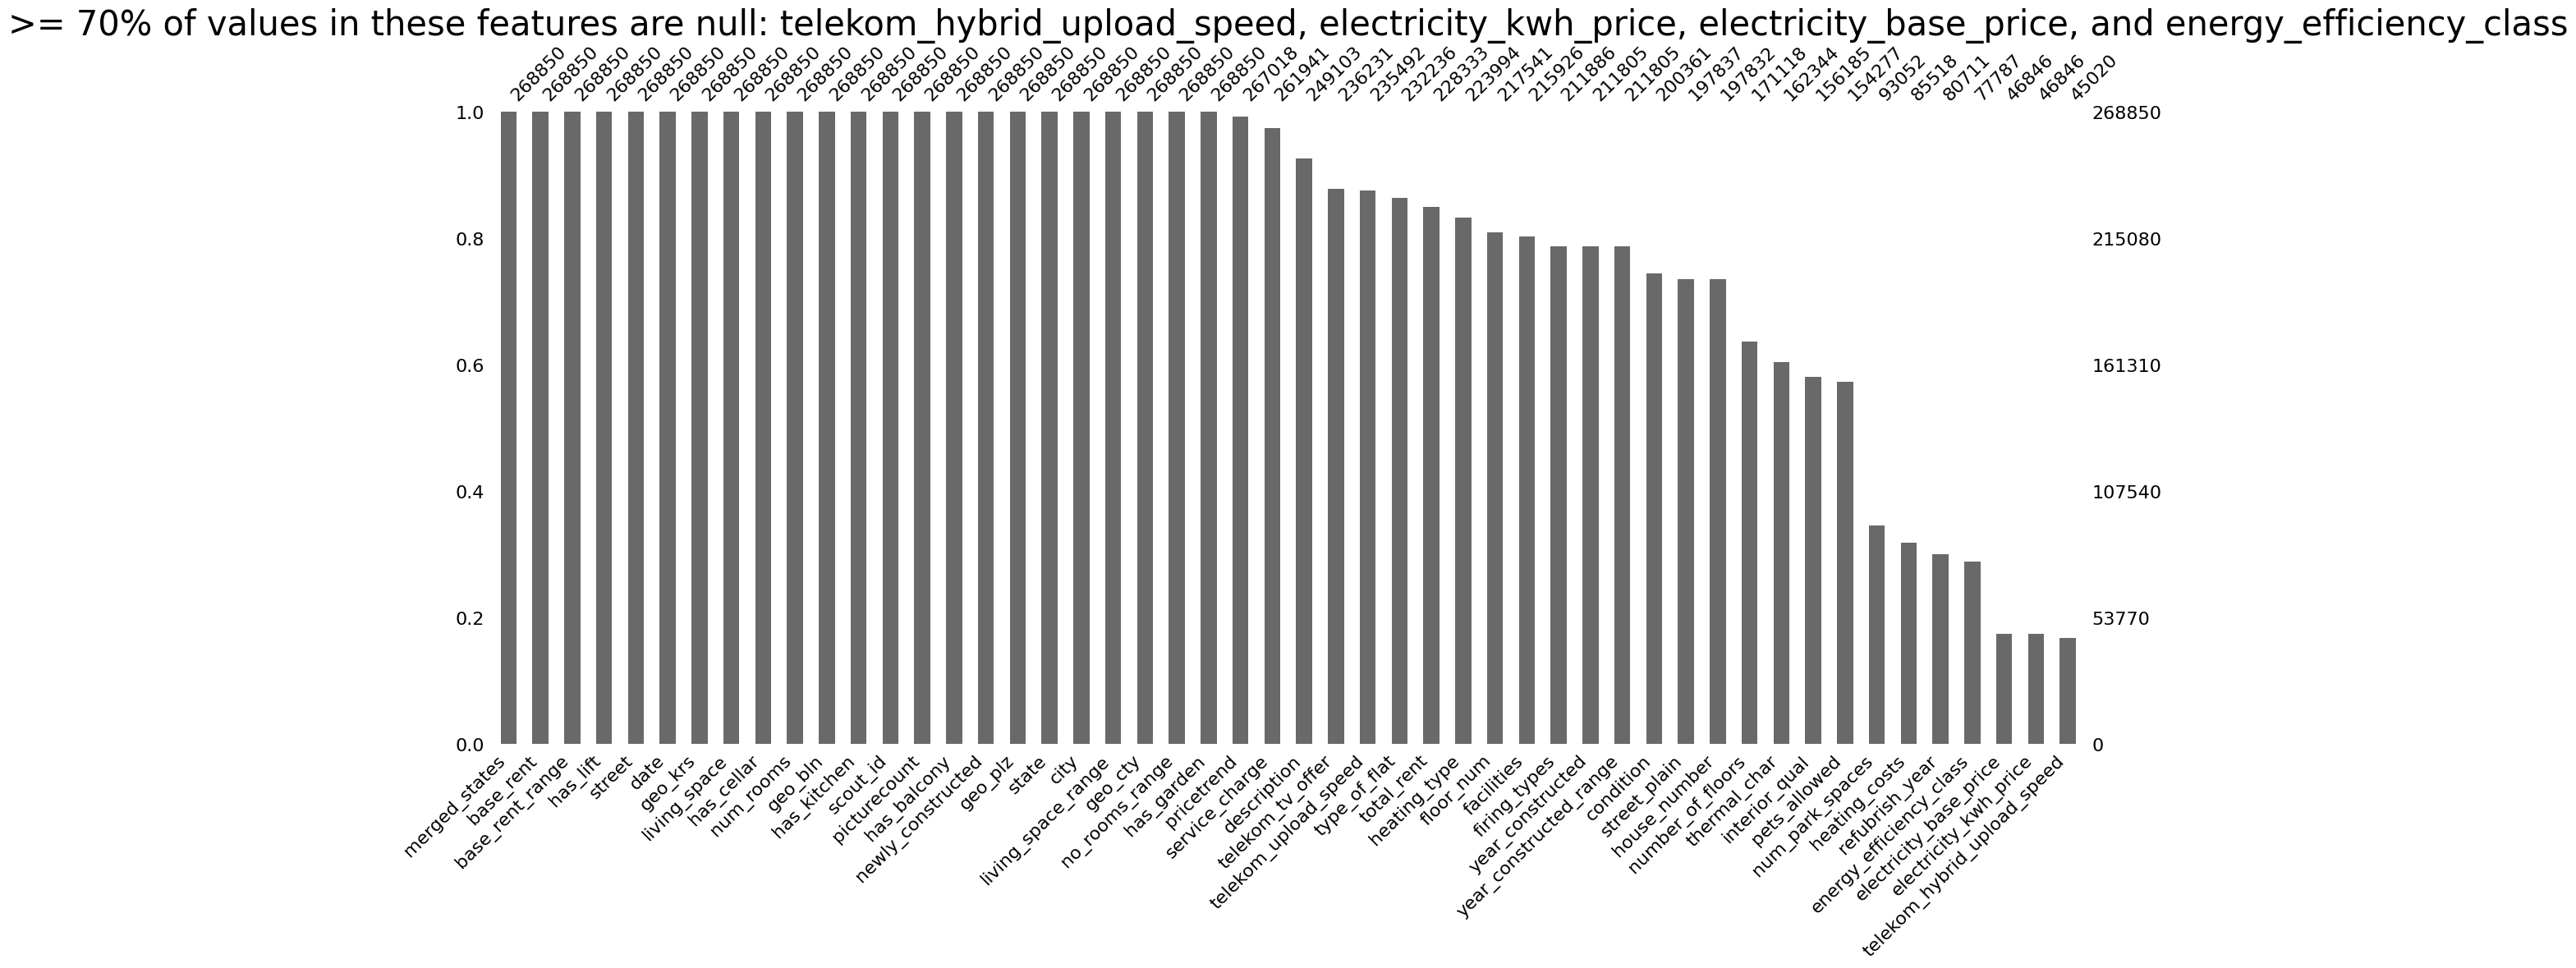

In [110]:
# Import missingno package
import missingno as msno

# Which columns have missing values?
msno.bar(df, sort='descending')
plt.title('>= 70% of values in these features are null: telekom_hybrid_upload_speed, electricity_kwh_price, electricity_base_price, and energy_efficiency_class',fontsize=30)
plt.show()

<Axes: >

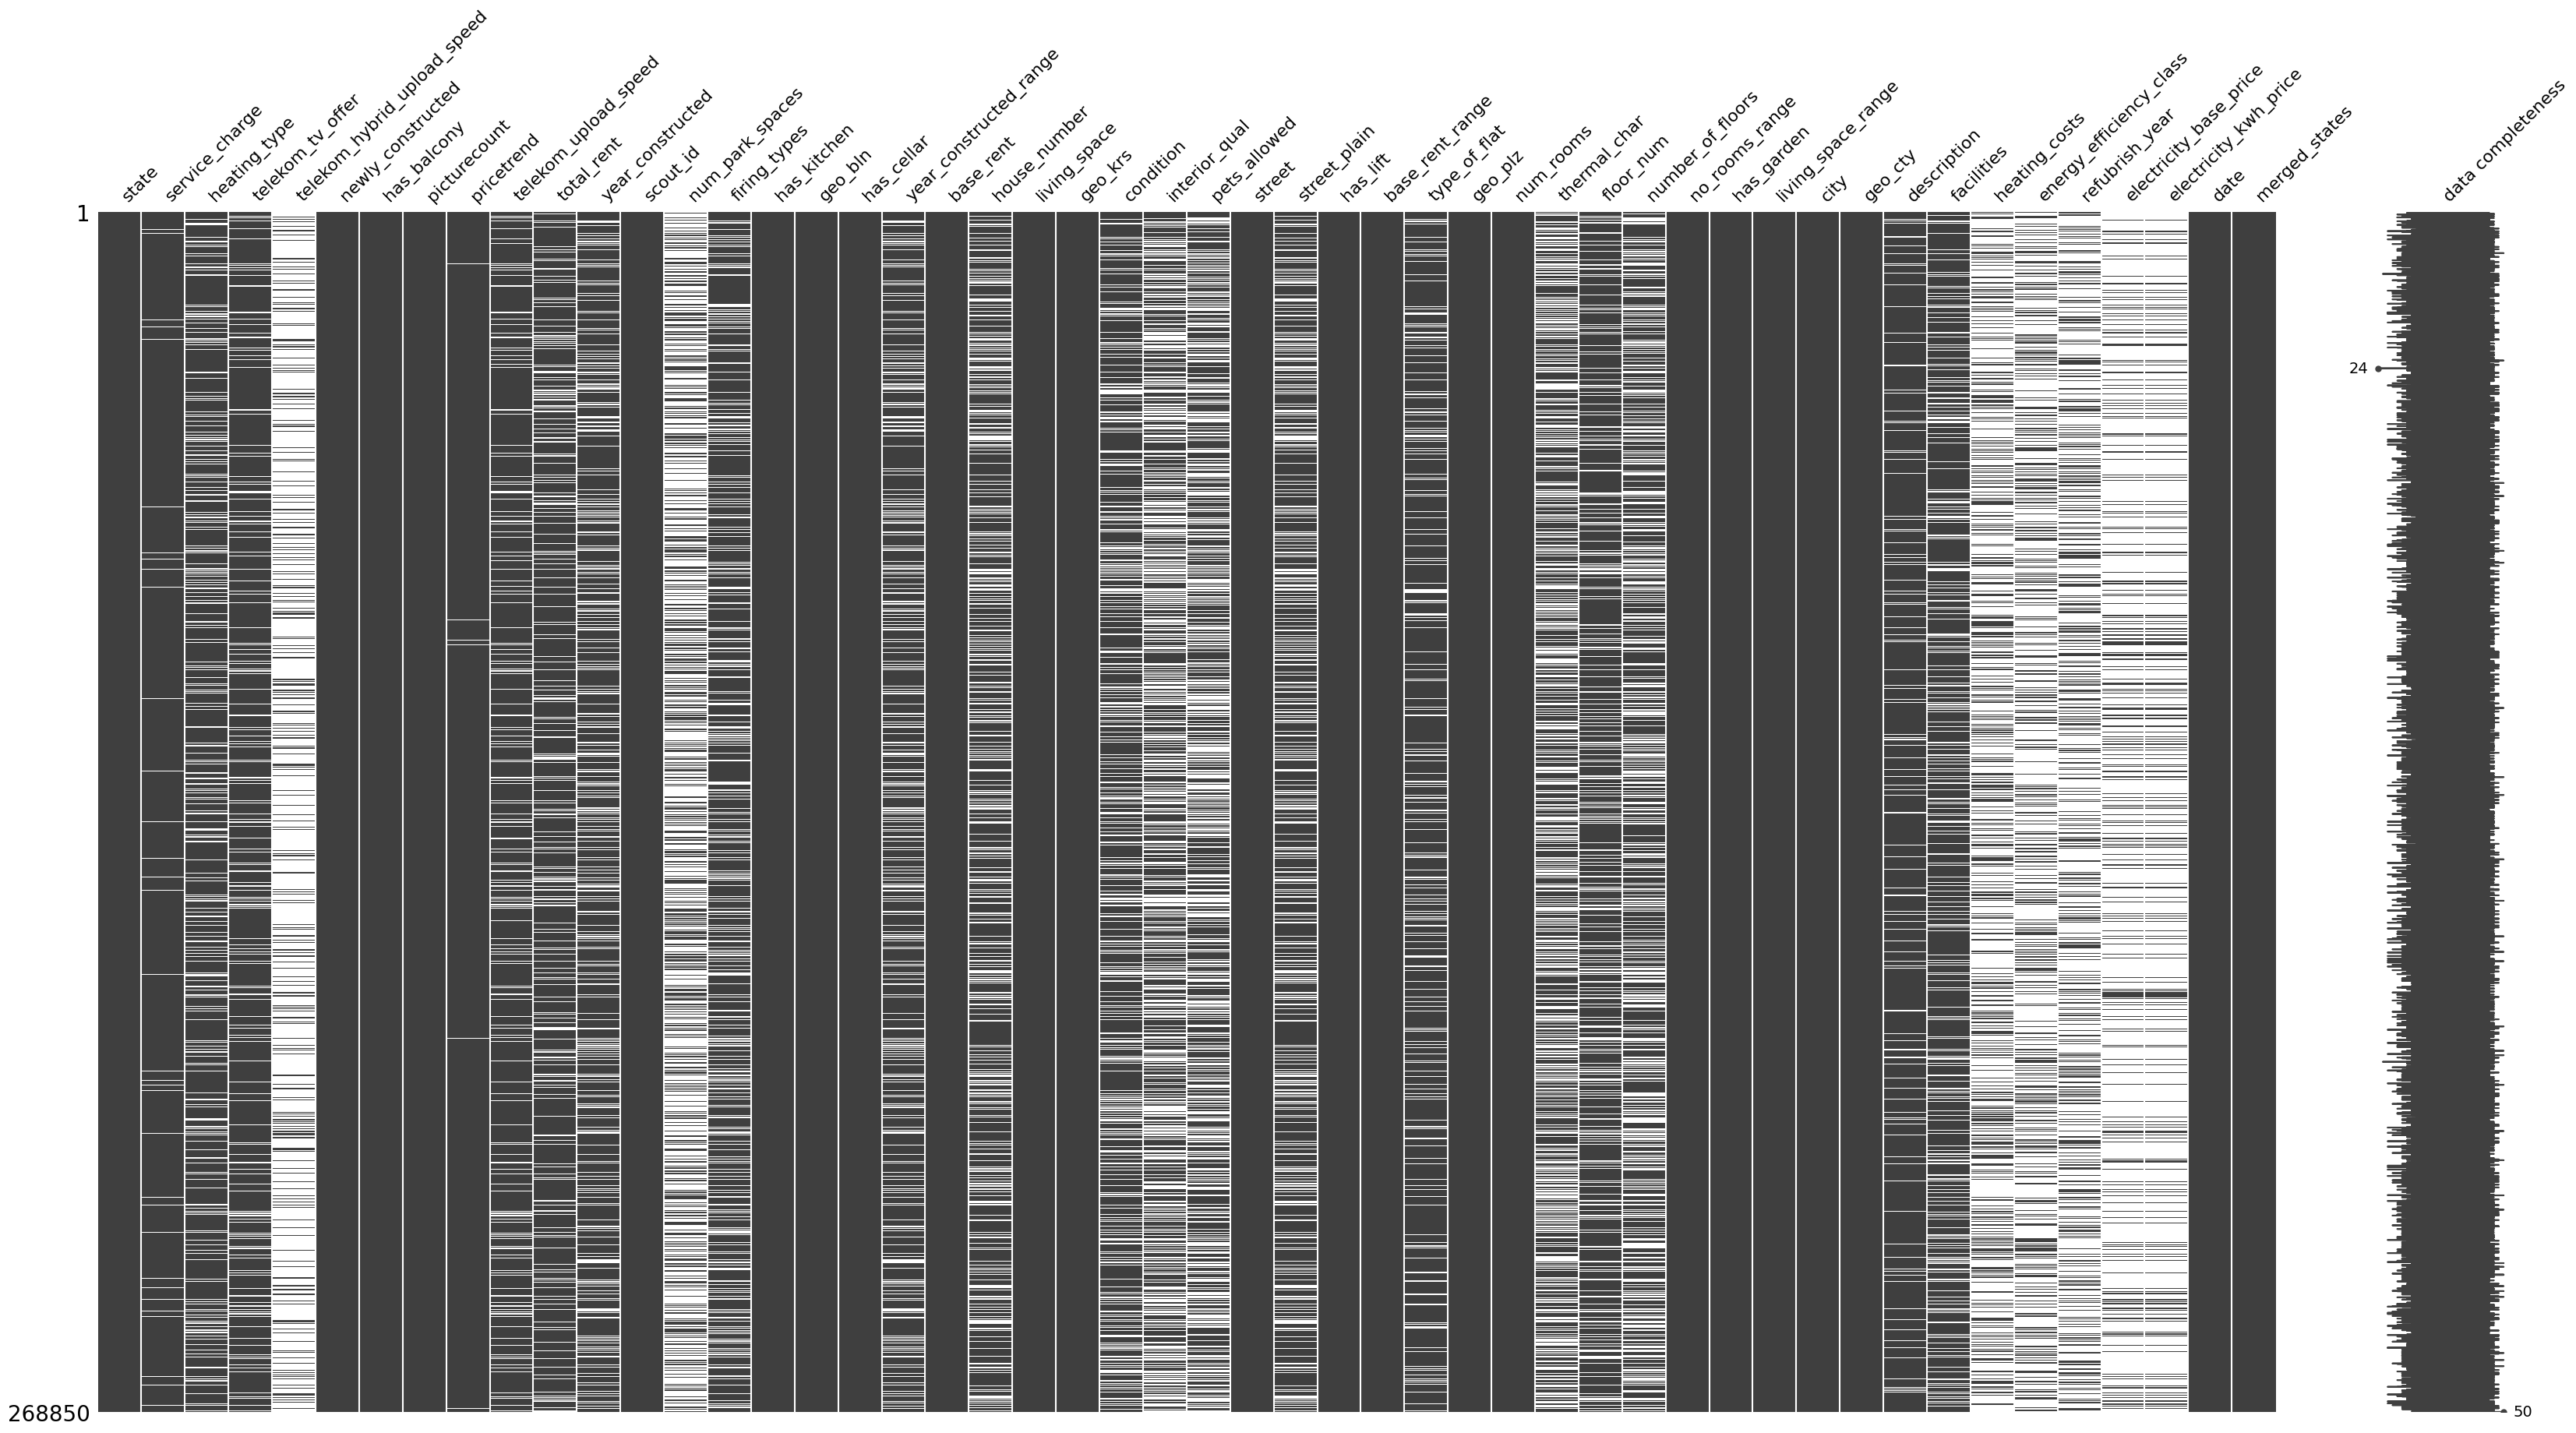

In [111]:
# Let's visualise the pattern of nulls in our dataset
msno.matrix(df, labels=True, figsize=(40,20))

# Absent data is shaded white, by default.

In [112]:
# Check value counts for categorical features with missingness
for feature in missing_values.index:
    if df[feature].dtype == 'object':
        print(f"{feature}\n{df[feature].value_counts(dropna=False, normalize=True)}\n") #Print value counts including na
    else:
        pass

energy_efficiency_class
energy_efficiency_class
NaN               0.710668
C                 0.054354
NO_INFORMATION    0.052557
D                 0.051795
B                 0.042154
E                 0.029708
A                 0.018553
F                 0.016678
A_PLUS            0.013457
G                 0.006718
H                 0.003359
Name: proportion, dtype: float64

pets_allowed
pets_allowed
NaN           0.426160
negotiable    0.342087
no            0.193383
yes           0.038371
Name: proportion, dtype: float64

interior_qual
interior_qual
NaN              0.419063
normal           0.304356
sophisticated    0.240885
luxury           0.028447
simple           0.007249
Name: proportion, dtype: float64

house_number
house_number
NaN           0.264155
1             0.026680
2             0.025248
4             0.021659
3             0.021239
                ...   
45/0302       0.000004
11/0102       0.000004
2,33          0.000004
7/9 WE 67     0.000004
32 (WE 66)    0.00000

<Axes: >

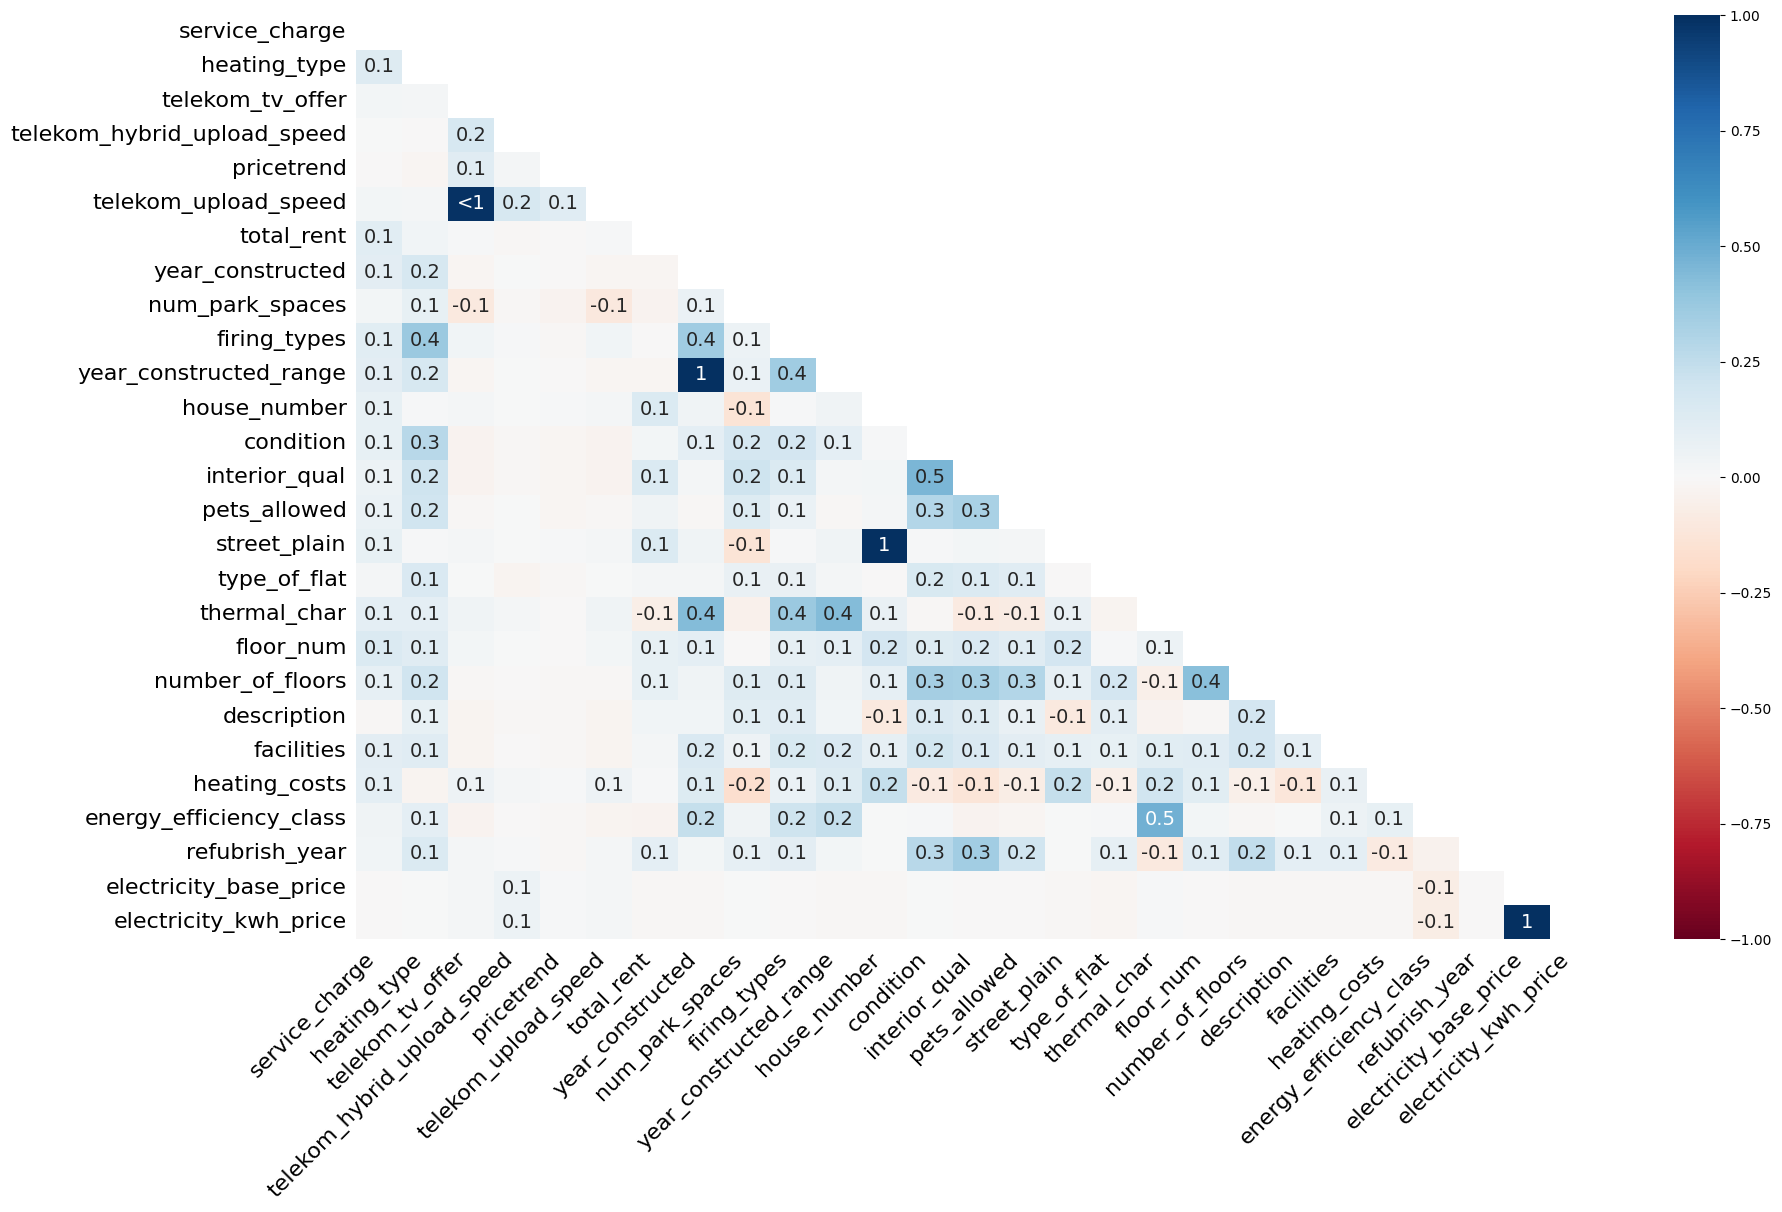

In [113]:
# Let's visualise the correlation between the missingness in different columns
msno.heatmap(df)

In [114]:
numerical_columns_remaned = ["total_rent","service_charge", "base_rent_range", "year_constructed", "num_park_spaces", "living_space", "num_rooms", "floor_num", "number_of_floors", "refubrish_year"]

In [115]:
data = df[numerical_columns_remaned]

# Print the new DataFrame
print(data)

        total_rent  service_charge  base_rent_range  year_constructed  \
0            840.0          245.00                4            1965.0   
1              NaN          134.00                5            1871.0   
2           1300.0          255.00                6            2019.0   
3              NaN           58.15                2            1964.0   
4            903.0          138.00                5            1950.0   
...            ...             ...              ...               ...   
268845       910.0           90.00                6            2016.0   
268846      1150.0          220.00                6            1983.0   
268847       930.0          220.00                5            1965.0   
268848      1015.0          175.00                6            2019.0   
268849         NaN          315.00                6            1972.0   

        num_park_spaces  living_space  num_rooms  floor_num  number_of_floors  \
0                   1.0         86.00     

<Axes: >

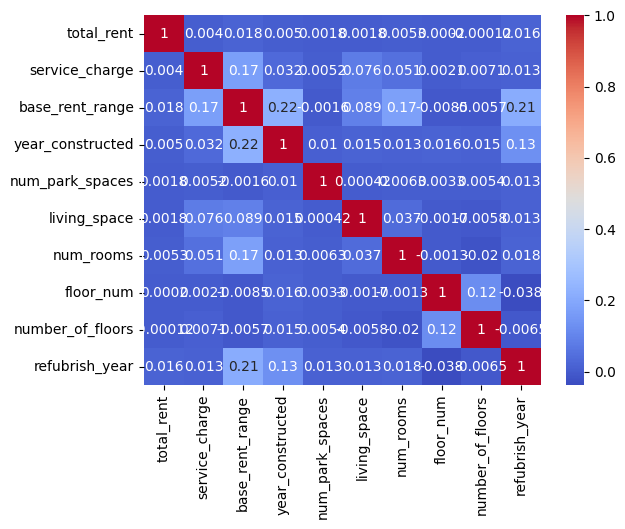

In [116]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [117]:
#drop columns where are more than 50 % null values are present
drop_list=['telekom_hybrid_upload_speed','electricity_kwh_price','electricity_base_price','refubrish_year','energy_efficiency_class','heating_costs','num_park_spaces']

In [118]:
df.drop(columns= drop_list,inplace=True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   state                   268850 non-null  object 
 1   service_charge          261941 non-null  float64
 2   heating_type            223994 non-null  object 
 3   telekom_tv_offer        236231 non-null  object 
 4   newly_constructed       268850 non-null  bool   
 5   has_balcony             268850 non-null  bool   
 6   picturecount            268850 non-null  int64  
 7   pricetrend              267018 non-null  float64
 8   telekom_upload_speed    235492 non-null  float64
 9   total_rent              228333 non-null  float64
 10  year_constructed        211805 non-null  float64
 11  scout_id                268850 non-null  int64  
 12  firing_types            211886 non-null  object 
 13  has_kitchen             268850 non-null  bool   
 14  geo_bln             

In [120]:
#drop columns which are not of so much importance in prediction
drop_list1=['state','city','picturecount','telekom_upload_speed','scout_id','firing_types','geo_bln','year_constructed_range','house_number','geo_krs','street','street_plain','base_rent_range','geo_plz','thermal_char','no_rooms_range','living_space_range','geo_cty','description','facilities','date']

In [121]:
df.drop(columns= drop_list1,inplace=True)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   service_charge     261941 non-null  float64
 1   heating_type       223994 non-null  object 
 2   telekom_tv_offer   236231 non-null  object 
 3   newly_constructed  268850 non-null  bool   
 4   has_balcony        268850 non-null  bool   
 5   pricetrend         267018 non-null  float64
 6   total_rent         228333 non-null  float64
 7   year_constructed   211805 non-null  float64
 8   has_kitchen        268850 non-null  bool   
 9   has_cellar         268850 non-null  bool   
 10  base_rent          268850 non-null  float64
 11  living_space       268850 non-null  float64
 12  condition          200361 non-null  object 
 13  interior_qual      156185 non-null  object 
 14  pets_allowed       154277 non-null  object 
 15  has_lift           268850 non-null  bool   
 16  ty

In [123]:
def missing_df(df):
    total_missing = df.isnull().sum()
    percent_missing = 100 * total_missing / len(df)
    missing_df = pd.DataFrame(data={"Total values missing": total_missing, "Percent missing": percent_missing})
    missing_df = missing_df[missing_df.iloc[:, 1] != 0].sort_values("Percent missing", ascending=False).round(2)
    return missing_df

In [124]:
missing_values = missing_df(df)
missing_values

,Total values missing,Percent missing
pets_allowed,114573,42.62
interior_qual,112665,41.91
number_of_floors,97732,36.35
condition,68489,25.47
year_constructed,57045,21.22
floor_num,51309,19.08
heating_type,44856,16.68
total_rent,40517,15.07
type_of_flat,36614,13.62
telekom_tv_offer,32619,12.13


In [125]:
df.dropna(inplace=True)

In [126]:
df.reset_index(drop=True, inplace=True)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48484 entries, 0 to 48483
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   service_charge     48484 non-null  float64
 1   heating_type       48484 non-null  object 
 2   telekom_tv_offer   48484 non-null  object 
 3   newly_constructed  48484 non-null  bool   
 4   has_balcony        48484 non-null  bool   
 5   pricetrend         48484 non-null  float64
 6   total_rent         48484 non-null  float64
 7   year_constructed   48484 non-null  float64
 8   has_kitchen        48484 non-null  bool   
 9   has_cellar         48484 non-null  bool   
 10  base_rent          48484 non-null  float64
 11  living_space       48484 non-null  float64
 12  condition          48484 non-null  object 
 13  interior_qual      48484 non-null  object 
 14  pets_allowed       48484 non-null  object 
 15  has_lift           48484 non-null  bool   
 16  type_of_flat       484

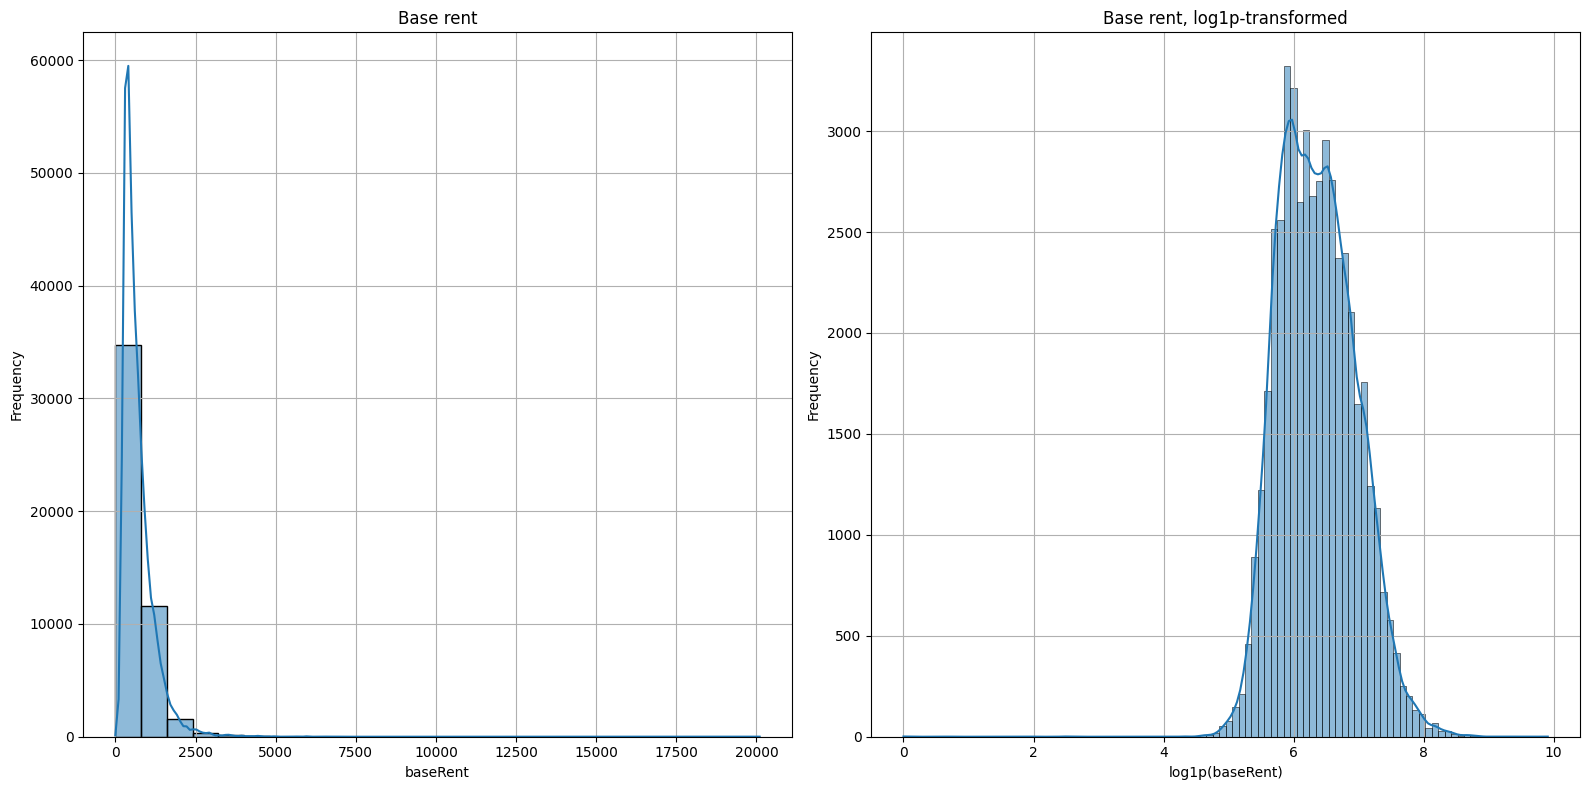

In [128]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

sns.histplot(df['base_rent'], bins=25, kde=True, ax=ax1)
ax1.set_title('Base rent')
ax1.set_xlabel('baseRent')
ax1.set_ylabel('Frequency')
ax1.grid(True)

sns.histplot(np.log1p(df['base_rent']), bins=100, kde=True, ax=ax2)
ax2.set_title('Base rent, log1p-transformed')
ax2.set_xlabel('log1p(baseRent)')
ax2.set_ylabel('Frequency')
ax2.grid(True)
plt.tight_layout()
plt.show()

In [129]:
df.isnull().sum()["base_rent"] / len(df)

0.0

In [130]:
df["baseRentTransformed"] = np.log1p(df["base_rent"])

In [131]:
df.drop('base_rent', axis=1, inplace=True)

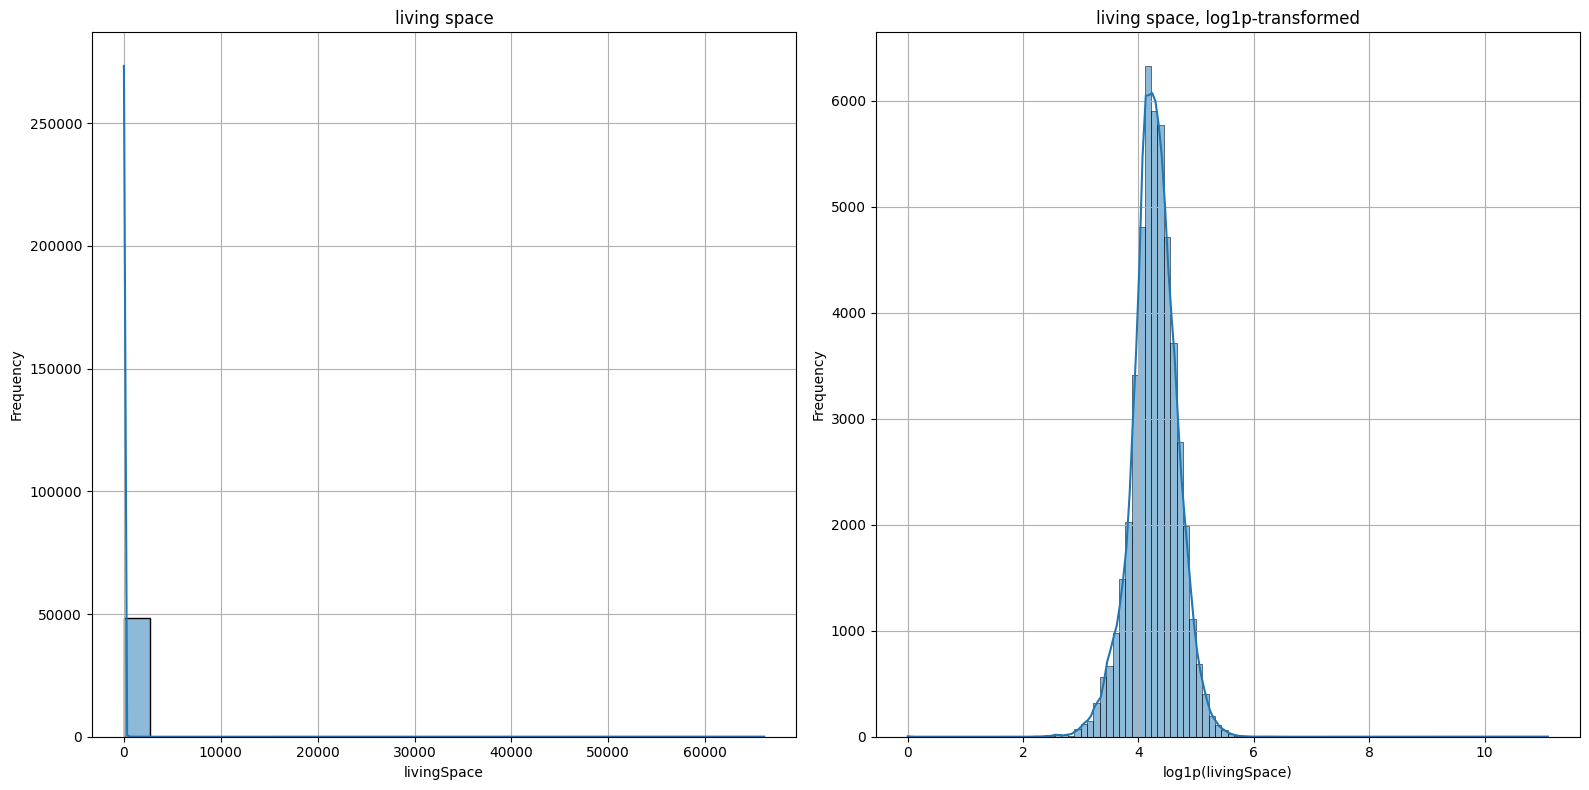

In [132]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

sns.histplot(df['living_space'], bins=25, kde=True, ax=ax1)
ax1.set_title('living space')
ax1.set_xlabel('livingSpace')
ax1.set_ylabel('Frequency')
ax1.grid(True)

sns.histplot(np.log1p(df['living_space']), bins=100, kde=True, ax=ax2)
ax2.set_title('living space, log1p-transformed')
ax2.set_xlabel('log1p(livingSpace)')
ax2.set_ylabel('Frequency')
ax2.grid(True)
plt.tight_layout()
plt.show()

In [133]:
df.isnull().sum()["living_space"] / len(df)

0.0

In [134]:
df["livingSpaceTransformed"] = np.log1p(df["living_space"])

In [135]:
df.drop('living_space', axis=1, inplace=True)

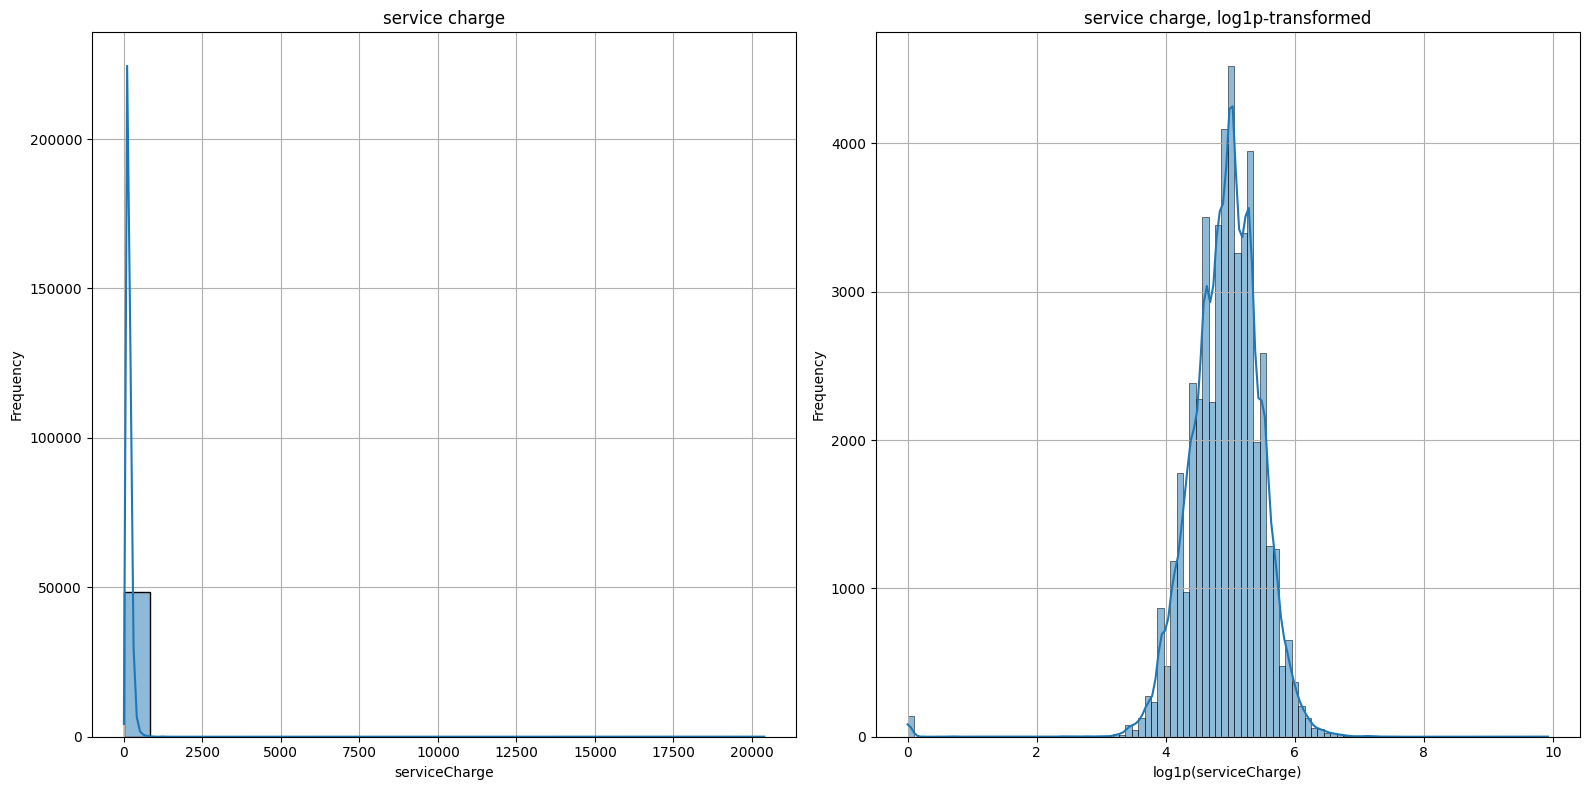

In [136]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

sns.histplot(df['service_charge'], bins=25, kde=True, ax=ax1)
ax1.set_title('service charge')
ax1.set_xlabel('serviceCharge')
ax1.set_ylabel('Frequency')
ax1.grid(True)

sns.histplot(np.log1p(df['service_charge']), bins=100, kde=True, ax=ax2)
ax2.set_title('service charge, log1p-transformed')
ax2.set_xlabel('log1p(serviceCharge)')
ax2.set_ylabel('Frequency')
ax2.grid(True)
plt.tight_layout()
plt.show()

In [137]:
df.isnull().sum()["service_charge"] / len(df)

0.0

In [138]:
df["ServiceChargeTransformed"] = np.log1p(df["service_charge"])

In [139]:
df.drop('service_charge', axis=1, inplace=True)

In [140]:
df.reset_index(drop=True, inplace=True)

In [141]:
Numerical_data= df.select_dtypes(include=['int64', 'float64'])

In [142]:
Numerical_data

,pricetrend,total_rent,year_constructed,num_rooms,floor_num,number_of_floors,baseRentTransformed,livingSpaceTransformed,ServiceChargeTransformed
0,3.77,690.00,1970.0,2.0,2.0,2.0,6.364751,3.988984,4.709530
1,3.76,1320.65,2018.0,3.0,0.0,4.0,6.881001,4.477337,5.375278
2,2.35,1878.48,2013.0,5.0,1.0,4.0,7.203763,4.859425,5.673323
3,5.00,1450.00,1978.0,4.0,0.0,2.0,7.048386,5.081404,4.948760
4,6.30,760.00,1953.0,3.0,2.0,4.0,6.431331,4.041120,4.948760
...,...,...,...,...,...,...,...,...,...
48479,4.30,1190.00,2020.0,2.5,1.0,2.0,6.898715,4.499810,5.303305
48480,3.39,805.00,1964.0,3.0,1.0,3.0,6.338594,4.691348,5.141664
48481,4.16,920.00,1958.0,3.0,4.0,4.0,6.608001,4.594413,5.198497
48482,6.90,1479.64,2016.0,3.0,2.0,4.0,7.135990,4.507227,4.728538


In [143]:
# Create a new DataFrame by replacing True/False with 1/0
bool_data = df.select_dtypes(include=[bool]).replace({True: 1, False: 0})

In [144]:
df.drop(bool_data.columns, axis=1, inplace=True)

In [145]:
df = pd.concat([df, bool_data], axis=1) # Concatenate DataFrames along columns (axis=1)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48484 entries, 0 to 48483
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   heating_type              48484 non-null  object 
 1   telekom_tv_offer          48484 non-null  object 
 2   pricetrend                48484 non-null  float64
 3   total_rent                48484 non-null  float64
 4   year_constructed          48484 non-null  float64
 5   condition                 48484 non-null  object 
 6   interior_qual             48484 non-null  object 
 7   pets_allowed              48484 non-null  object 
 8   type_of_flat              48484 non-null  object 
 9   num_rooms                 48484 non-null  float64
 10  floor_num                 48484 non-null  float64
 11  number_of_floors          48484 non-null  float64
 12  merged_states             48484 non-null  object 
 13  baseRentTransformed       48484 non-null  float64
 14  living

In [147]:
object_columns_df = df.select_dtypes(include=['object'])

In [148]:
object_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48484 entries, 0 to 48483
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   heating_type      48484 non-null  object
 1   telekom_tv_offer  48484 non-null  object
 2   condition         48484 non-null  object
 3   interior_qual     48484 non-null  object
 4   pets_allowed      48484 non-null  object
 5   type_of_flat      48484 non-null  object
 6   merged_states     48484 non-null  object
dtypes: object(7)
memory usage: 2.6+ MB


In [149]:
unique_values = object_columns_df.apply(pd.Series.unique)

# Display the unique values in each column
for column, values in unique_values.items():
    print(f"Unique values in '{column}': {len(values)}")

Unique values in 'heating_type': 13
Unique values in 'telekom_tv_offer': 3
Unique values in 'condition': 10
Unique values in 'interior_qual': 4
Unique values in 'pets_allowed': 3
Unique values in 'type_of_flat': 10
Unique values in 'merged_states': 16


In [162]:
# Perform one-hot encoding on the categorical columns
from sklearn.preprocessing import OneHotEncoder
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# Fit and transform categorical columns
encoded_data = encoder.fit_transform(df[['merged_states', 'heating_type','interior_qual','pets_allowed']])

# Convert encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['merged_states', 'heating_type','interior_qual','pets_allowed']))
# Combine with the original DataFrame (excluding the original categorical columns)
final_data = pd.concat([df.drop(columns=['merged_states', 'heating_type','interior_qual','pets_allowed','telekom_tv_offer','condition','type_of_flat']), encoded_df], axis=1)


In [163]:
final_data

,pricetrend,total_rent,year_constructed,num_rooms,floor_num,number_of_floors,baseRentTransformed,livingSpaceTransformed,ServiceChargeTransformed,newly_constructed,...,heating_type_solar_heating,heating_type_stove_heating,heating_type_wood_pellet_heating,interior_qual_luxury,interior_qual_normal,interior_qual_simple,interior_qual_sophisticated,pets_allowed_negotiable,pets_allowed_no,pets_allowed_yes
0,3.77,690.00,1970.0,2.0,2.0,2.0,6.364751,3.988984,4.709530,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,3.76,1320.65,2018.0,3.0,0.0,4.0,6.881001,4.477337,5.375278,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,2.35,1878.48,2013.0,5.0,1.0,4.0,7.203763,4.859425,5.673323,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,5.00,1450.00,1978.0,4.0,0.0,2.0,7.048386,5.081404,4.948760,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,6.30,760.00,1953.0,3.0,2.0,4.0,6.431331,4.041120,4.948760,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48479,4.30,1190.00,2020.0,2.5,1.0,2.0,6.898715,4.499810,5.303305,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
48480,3.39,805.00,1964.0,3.0,1.0,3.0,6.338594,4.691348,5.141664,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
48481,4.16,920.00,1958.0,3.0,4.0,4.0,6.608001,4.594413,5.198497,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
48482,6.90,1479.64,2016.0,3.0,2.0,4.0,7.135990,4.507227,4.728538,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [164]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48484 entries, 0 to 48483
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   pricetrend                                   48484 non-null  float64
 1   total_rent                                   48484 non-null  float64
 2   year_constructed                             48484 non-null  float64
 3   num_rooms                                    48484 non-null  float64
 4   floor_num                                    48484 non-null  float64
 5   number_of_floors                             48484 non-null  float64
 6   baseRentTransformed                          48484 non-null  float64
 7   livingSpaceTransformed                       48484 non-null  float64
 8   ServiceChargeTransformed                     48484 non-null  float64
 9   newly_constructed                            48484 non-null  int64  
 10

In [165]:
final_data['year_constructed'].sort_values()

,year_constructed
23130,1097.0
26131,1195.0
42370,1276.0
43475,1300.0
21536,1300.0
...,...
18955,2020.0
5844,2020.0
23302,2020.0
31578,2020.0


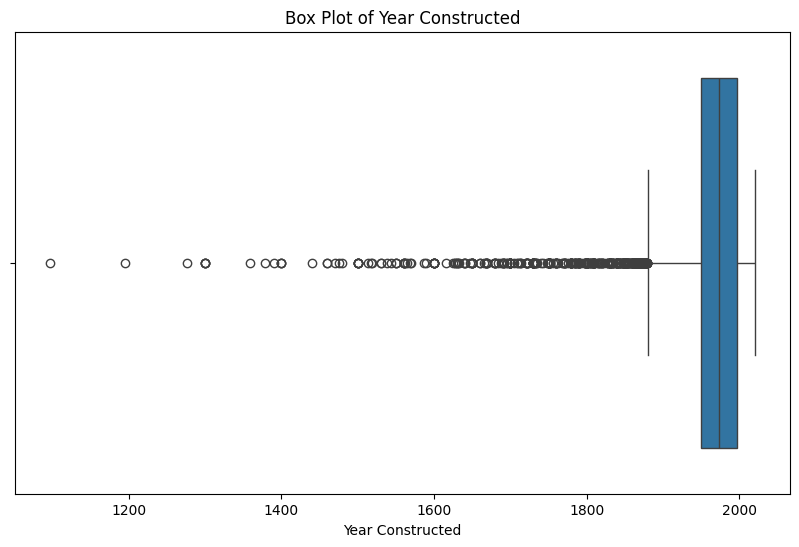

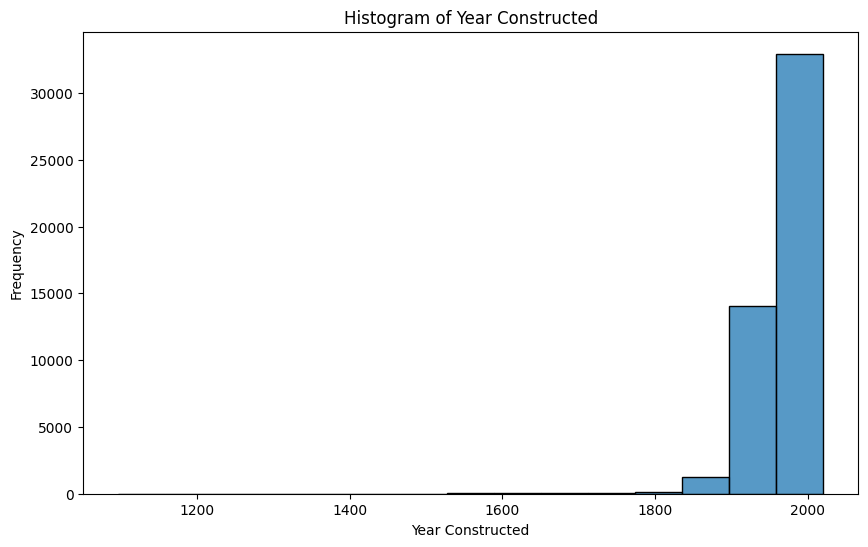

In [166]:
# Create a Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=final_data['year_constructed'])
plt.title('Box Plot of Year Constructed')
plt.xlabel('Year Constructed')
plt.show()

# Create a Histogram
plt.figure(figsize=(10, 6))
sns.histplot(final_data['year_constructed'], bins=15, kde=False)
plt.title('Histogram of Year Constructed')
plt.xlabel('Year Constructed')
plt.ylabel('Frequency')
plt.show()



In [167]:
# Filter rows where year_constructed is greater than 1800
data_filtered = final_data[final_data['year_constructed'] > 1400]

In [168]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# data_filtered['year_normalized'] = scaler.fit_transform(data_filtered[['year_constructed']])


In [169]:
import numpy as np

data_filtered['year_log_normalized'] = np.log1p(data_filtered['year_constructed'])


In [170]:
data_filtered.head(3)

,pricetrend,total_rent,year_constructed,num_rooms,floor_num,number_of_floors,baseRentTransformed,livingSpaceTransformed,ServiceChargeTransformed,newly_constructed,...,heating_type_stove_heating,heating_type_wood_pellet_heating,interior_qual_luxury,interior_qual_normal,interior_qual_simple,interior_qual_sophisticated,pets_allowed_negotiable,pets_allowed_no,pets_allowed_yes,year_log_normalized
0,3.77,690.00,1970.0,2.0,2.0,2.0,6.364751,3.988984,4.709530,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,7.586296
1,3.76,1320.65,2018.0,3.0,0.0,4.0,6.881001,4.477337,5.375278,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,7.610358
2,2.35,1878.48,2013.0,5.0,1.0,4.0,7.203763,4.859425,5.673323,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,7.607878


In [171]:
data_filtered.drop(columns= ['year_constructed','year_log_normalized'],inplace=True)

In [172]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48471 entries, 0 to 48483
Data columns (total 50 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   pricetrend                                   48471 non-null  float64
 1   total_rent                                   48471 non-null  float64
 2   num_rooms                                    48471 non-null  float64
 3   floor_num                                    48471 non-null  float64
 4   number_of_floors                             48471 non-null  float64
 5   baseRentTransformed                          48471 non-null  float64
 6   livingSpaceTransformed                       48471 non-null  float64
 7   ServiceChargeTransformed                     48471 non-null  float64
 8   newly_constructed                            48471 non-null  int64  
 9   has_balcony                                  48471 non-null  int64  
 10  has

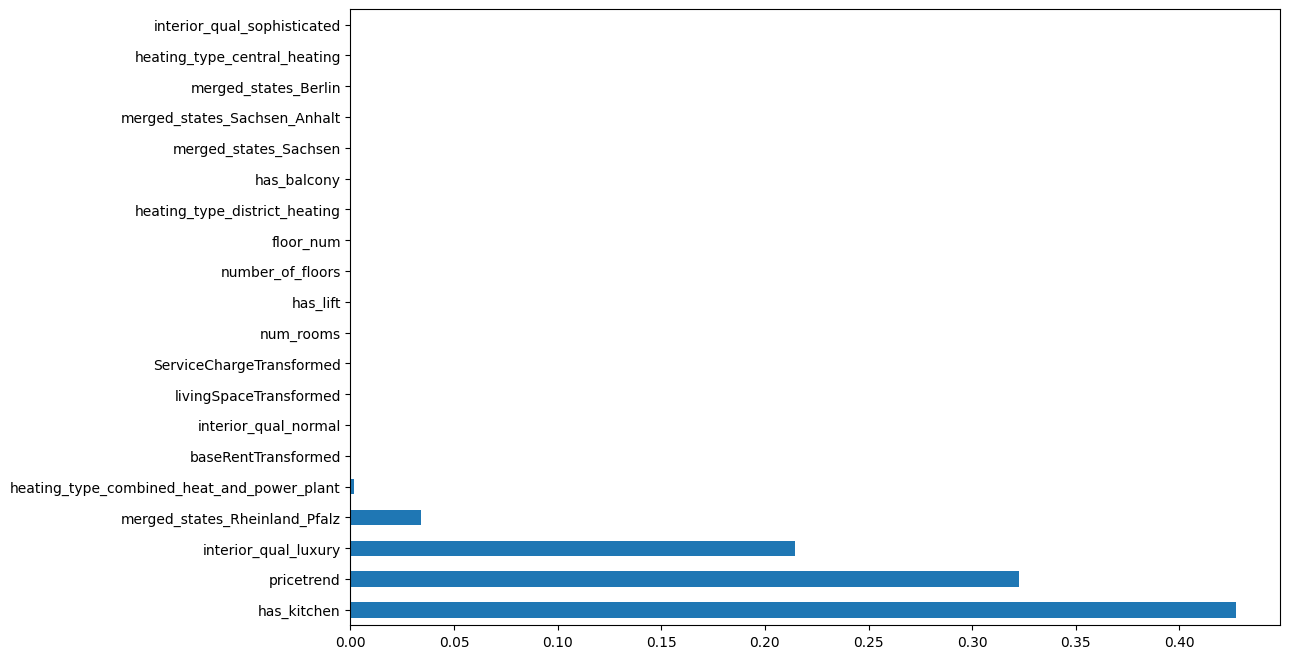

In [173]:

# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor

# split the data into X and y where y = total_rent
X = data_filtered.drop('total_rent', axis=1)
y = data_filtered['total_rent']

selection = ExtraTreesRegressor()
# fit the model
selection.fit(X, y)

#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [174]:
# divide data into trian, validation and test data_final
from sklearn.model_selection import train_test_split

X = data_filtered.drop('total_rent', axis=1)
y = data_filtered['total_rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)


(31020, 49) (7756, 49) (9695, 49)


In [72]:
# apply xgboost model to the train data
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# predict the validation data
y_pred = model.predict(X_val)

# check the performance of the model using mean squared error
print('MSE : ',mean_squared_error(y_val, y_pred))
#print MAE
print('MAE : ',mean_absolute_error(y_val, y_pred))
print('RMSE : {}'.format(np.sqrt(mean_squared_error(y_val, y_pred))))


(31020, 72) (7756, 72) (9695, 72)
MSE :  31976804890.064045
MAE :  2062.790731582976
RMSE : 178820.59414414226


In [175]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Fit the XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Predict on the validation data
y_pred = model.predict(X_val)

# Calculate and print MSE
mse = mean_squared_error(y_val, y_pred)
print('MSE : ', mse)

# Calculate and print MAE
mae = mean_absolute_error(y_val, y_pred)
print('MAE : ', mae)

# Calculate and print RMSE
rmse = np.sqrt(mse)
print('RMSE : ', rmse)

# Calculate and print R2 score
r2 = r2_score(y_val, y_pred)
print('R2 : ', r2)


MSE :  31978698657.506874
MAE :  2062.19043307357
RMSE :  178825.88922610416
R2 :  -91562.09471408247


In [176]:

# calculate the feature importance
feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

# print feature_importance of each column
feature_importance = pd.DataFrame(feature_importance, index=X.columns, columns=['importance'])
feature_importance.sort_values(by='importance', ascending=False)
feature_importance

,importance
pricetrend,2.675909e+01
num_rooms,2.539702e-05
floor_num,4.016860e-05
number_of_floors,3.867620e-05
baseRentTransformed,3.789721e+01
livingSpaceTransformed,1.989782e-05
ServiceChargeTransformed,3.772196e-05
newly_constructed,2.682885e-05
has_balcony,5.204544e-06
has_kitchen,1.024675e-05


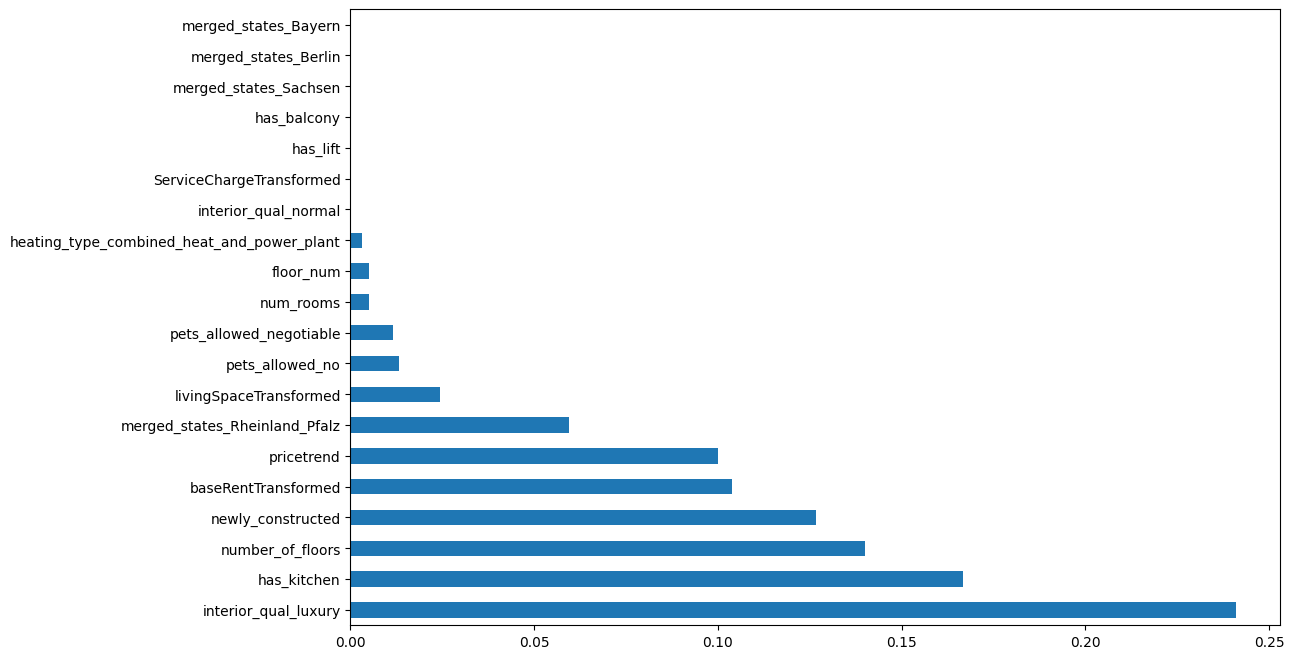

In [177]:

# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor

# split the data into X and y where y = total_rent
#X = data_filtered.drop('total_rent', axis=1)
#y = data_filtered['total_rent']

selection = ExtraTreesRegressor()
# fit the model
selection.fit(X_train, y_train)

#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [178]:
# hyperparameter tuning of XGBoost model on the validation data using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
            'learning_rate' : [0.05, 0.5, 0.8, 0.1, 0.20],
            'max_depth' : [3, 5, 7, 9, 11],
            'gamma' : [0.01, 0.1,0.2, 0.3, 0.4, 0.5],
            'min_child_weight' : [1, 3, 5, 7, 9],
            'colsample_bytree' : [0.2, 0.5, 0.8, 0.1, 0.20, 0.25, 0.30]
        }


model = xgb.XGBRegressor()
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10,
                                   n_jobs=1, cv=5, verbose=2, random_state=42)
random_search.fit(X_val, y_val)

# print the best parameters
print(random_search.best_params_)
print(random_search.best_score_)
print(random_search.best_estimator_)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.5, gamma=0.01, learning_rate=0.2, max_depth=7, min_child_weight=1; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=0.01, learning_rate=0.2, max_depth=7, min_child_weight=1; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=0.01, learning_rate=0.2, max_depth=7, min_child_weight=1; total time=   0.3s
[CV] END colsample_bytree=0.5, gamma=0.01, learning_rate=0.2, max_depth=7, min_child_weight=1; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=0.01, learning_rate=0.2, max_depth=7, min_child_weight=1; total time=   0.4s
[CV] END colsample_bytree=0.3, gamma=0.5, learning_rate=0.2, max_depth=3, min_child_weight=3; total time=   0.2s
[CV] END colsample_bytree=0.3, gamma=0.5, learning_rate=0.2, max_depth=3, min_child_weight=3; total time=   0.2s
[CV] END colsample_bytree=0.3, gamma=0.5, learning_rate=0.2, max_depth=3, min_child_weight=3; total time=   0.2s
[CV] END colsample_bytree=0.3,

In [179]:
# define the best model with {'min_child_weight': 1, 'max_depth': 11, 'learning_rate': 0.5, 'gamma': 0.5, 'colsample_bytree': 0.5}
model_best = xgb.XGBRegressor(min_child_weight=1, max_depth=7, learning_rate=0.2, gamma=0.01, colsample_bytree=0.5)
model_best.fit(X_val, y_val)


# predict the test data
pred = model_best.predict(X_test)
print('MSE : ',mean_squared_error(y_test, pred))
print('MAE : ',mean_absolute_error(y_test, pred))
print('RMSE : {}'.format(np.sqrt(mean_squared_error(y_test, pred))))
# Calculate and print R2 score
r2 = r2_score(y_val, y_pred)
print('R2 : ', r2)


MSE :  413711.01276771736
MAE :  51.112648519530744
RMSE : 643.2037101632089
R2 :  -91562.09471408247
